In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv']


In [3]:
data = pd.read_csv("../input/train.csv")
useful_data = data[['final_which_formula_and_why','final_why_formulas_useful','final_final_choice']]
labels = data[['Reflection_in_mastery']]
from sklearn.model_selection import train_test_split
data_train, data_test, labels_train, labels_test = train_test_split(useful_data,labels,test_size=0.1)
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers.core import Dense
from keras.layers.recurrent import LSTM
from keras.layers import Input
from keras.regularizers import *
import keras

Using TensorFlow backend.


In [4]:
model = Sequential()
model.add(Embedding(name='Embedding_1',dropout= 0.2,output_dim= 128,input_dim= 5000))
model.add(LSTM(name='LSTM_1',output_dim= 128,dropout_U= 0.2,dropout_W= 0.2))
model.add(Dense(name='Dense_2',output_dim= 2,activation= 'sigmoid' ))

model.compile(loss=keras.losses.binary_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(name="LSTM_1", units=128, dropout=0.2, recurrent_dropout=0.2)`
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(name="Dense_2", activation="sigmoid", units=2)`
  after removing the cwd from sys.path.


In [9]:
batch_size = 128
epochs = 10
y_train = keras.utils.to_categorical(labels_train, num_classes=2)
y_test = keras.utils.to_categorical(labels_test, num_classes=2)

def data2matrix(data):
    numpy_matrix = data.as_matrix()
    data_x = []
    for row in numpy_matrix:
        new_row = []
        for elem in row:
            temp = elem.split(';')
            for n in temp:
                new_row.append(int(n))
        data_x.append(new_row)
    return np.asarray(data_x)

np_data_train = data2matrix(data_train)
np_data_test = data2matrix(data_test)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [7]:
import matplotlib.pyplot as plt

from IPython.display import clear_output

%matplotlib inline

class PlotLearning(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

        clear_output(wait=True)

        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="val_loss")
        ax1.legend()

        ax2.plot(self.x, self.acc, label="accuracy")
        ax2.plot(self.x, self.val_acc, label="validation accuracy")
        ax2.legend()

        plt.show();


plot = PlotLearning()



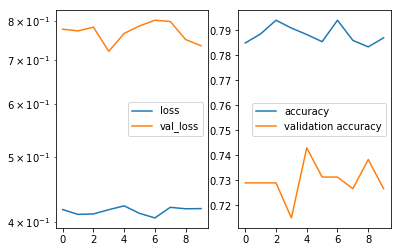

In [10]:
model.fit(np_data_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(np_data_test, y_test),callbacks=[plot])


In [ ]:
test_loss, test_acc = model.evaluate(np_data_test, y_test)

print('Test accuracy:', test_acc)

predictions = model.predict(np_data_test)
temp_m = labels_test.as_matrix()
for i in range(len(np_data_test)):
    print('prediction ',np.argmax(predictions[i]),' test ',temp_m[i],'category ',y_test[i])

 64/214 [=======>......................] - ETA: 0s